In [240]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_columns", 200)

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [194]:
# df_train = pd.read_csv("../data/feature/random_under_sampling/df_train.csv",index_col=0)
# df_test = pd.read_csv("../data/feature/random_under_sampling/df_test.csv",index_col=0)

In [517]:
year_month = "201712"

In [518]:
df_train = pd.read_csv("../data/feature/random_under_sampling/new_df_train_{}.csv".format(year_month),index_col=0)
df_test = pd.read_csv("../data/feature/random_under_sampling/new_df_test_{}.csv".format(year_month),index_col=0)

In [523]:
df_train["cv_flg"].value_counts()

0.0    6360
1.0    6360
Name: cv_flg, dtype: int64

In [503]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    if max == 0 and min == 0:
        return x
    else:
        result = (x-min)/(max-min)
        return result

In [504]:
df_train["num_of_pages"] = min_max(df_train["num_of_pages"].values)
df_train["num_of_move_block"] = min_max(df_train["num_of_move_block"].values)
df_train["num_keyword"] = min_max(df_train["num_of_move_block"].values)

df_train['num_go_block_/simulation/'] = min_max(df_train["num_go_block_/simulation/"].values)
df_train["num_go_block_CV"] = min_max(df_train["num_go_block_CV"].values)
df_train["num_go_block_about"] = min_max(df_train["num_go_block_about"].values)
df_train["num_go_block_business"] = min_max(df_train["num_go_block_business"].values)
df_train["num_go_block_catalog"] = min_max(df_train["num_go_block_catalog"].values)
df_train["num_go_block_cms"] = min_max(df_train["num_go_block_cms"].values)
df_train["num_go_block_cus_main"] = min_max(df_train["num_go_block_cus_main"].values)
df_train["num_go_block_detect_cate"] = min_max(df_train["num_go_block_detect_cate"].values)
df_train["num_go_block_digitaldesk"] = min_max(df_train["num_go_block_digitaldesk"].values)
df_train["num_go_block_faq"] = min_max(df_train["num_go_block_faq"].values)
df_train["num_go_block_inax"] = min_max(df_train["num_go_block_inax"].values)
df_train["num_go_block_inquiry"] = min_max(df_train["num_go_block_inquiry"].values)
df_train["num_go_block_kento"] = min_max(df_train["num_go_block_kento"].values)
df_train["num_go_block_kotsu"] = min_max(df_train["num_go_block_kotsu"].values)
df_train["num_go_block_lineup"] = min_max(df_train["num_go_block_lineup"].values)
df_train["num_go_block_long_support"] = min_max(df_train["num_go_block_long_support"].values)
df_train["num_go_block_madeby"] = min_max(df_train["num_go_block_madeby"].values)
df_train["num_go_block_main"] = min_max(df_train["num_go_block_main"].values)
df_train["num_go_block_others"] = min_max(df_train["num_go_block_others"].values)
df_train["num_go_block_otoku"] = min_max(df_train["num_go_block_otoku"].values)
df_train["num_go_block_ownerreg"] = min_max(df_train["num_go_block_ownerreg"].values)
df_train["num_go_block_owners"] = min_max(df_train["num_go_block_owners"].values)
df_train["num_go_block_policy_etc"] = min_max(df_train["num_go_block_policy_etc"].values)
df_train["num_go_block_purpose"] = min_max(df_train["num_go_block_purpose"].values)
df_train["num_go_block_qa"] = min_max(df_train["num_go_block_qa"].values)
df_train["num_go_block_rakuraku"] = min_max(df_train["num_go_block_rakuraku"].values)
df_train["num_go_block_rechent"] = min_max(df_train["num_go_block_rechent"].values)
df_train["num_go_block_reform_con"] = min_max(df_train["num_go_block_reform_con"].values)
df_train["num_go_block_reform_main"] = min_max(df_train["num_go_block_reform_main"].values)
df_train["num_go_block_reform_part"] = min_max(df_train["num_go_block_reform_part"].values)
df_train["num_go_block_search"] = min_max(df_train["num_go_block_search"].values)
df_train["num_go_block_seekreform"] = min_max(df_train["num_go_block_seekreform"].values)
df_train["num_go_block_shinnikkei"] = min_max(df_train["num_go_block_shinnikkei"].values)
df_train["num_go_block_show_fair"] = min_max(df_train["num_go_block_show_fair"].values)
df_train["num_go_block_show_main"] = min_max(df_train["num_go_block_show_main"].values)
df_train["num_go_block_tostem"] = min_max(df_train["num_go_block_tostem"].values)
df_train["num_go_block_twenty"] = min_max(df_train["num_go_block_twenty"].values)
df_train["num_go_block_warning"] = min_max(df_train["num_go_block_warning"].values)
df_train["num_go_block_web_consult"] = min_max(df_train["num_go_block_web_consult"].values)
df_train["num_go_block_yougo"] = min_max(df_train["num_go_block_yougo"].values)


df_test["num_of_pages"] = min_max(df_test["num_of_pages"].values)
df_test["num_of_move_block"] = min_max(df_test["num_of_move_block"].values)
df_test["num_keyword"] = min_max(df_test["num_of_move_block"].values)

df_test['num_go_block_/simulation/'] = min_max(df_test["num_go_block_/simulation/"].values)
df_test["num_go_block_CV"] = min_max(df_test["num_go_block_CV"].values)
df_test["num_go_block_about"] = min_max(df_test["num_go_block_about"].values)
df_test["num_go_block_business"] = min_max(df_test["num_go_block_business"].values)
df_test["num_go_block_catalog"] = min_max(df_test["num_go_block_catalog"].values)
df_test["num_go_block_cms"] = min_max(df_test["num_go_block_cms"].values)
df_test["num_go_block_cus_main"] = min_max(df_test["num_go_block_cus_main"].values)
df_test["num_go_block_detect_cate"] = min_max(df_test["num_go_block_detect_cate"].values)
df_test["num_go_block_digitaldesk"] = min_max(df_test["num_go_block_digitaldesk"].values)
df_test["num_go_block_faq"] = min_max(df_test["num_go_block_faq"].values)
df_test["num_go_block_inax"] = min_max(df_test["num_go_block_inax"].values)
df_test["num_go_block_inquiry"] = min_max(df_test["num_go_block_inquiry"].values)
df_test["num_go_block_kento"] = min_max(df_test["num_go_block_kento"].values)
df_test["num_go_block_kotsu"] = min_max(df_test["num_go_block_kotsu"].values)
df_test["num_go_block_lineup"] = min_max(df_test["num_go_block_lineup"].values)
df_test["num_go_block_long_support"] = min_max(df_test["num_go_block_long_support"].values)
df_test["num_go_block_madeby"] = min_max(df_test["num_go_block_madeby"].values)
df_test["num_go_block_main"] = min_max(df_test["num_go_block_main"].values)
df_test["num_go_block_others"] = min_max(df_test["num_go_block_others"].values)
df_test["num_go_block_otoku"] = min_max(df_test["num_go_block_otoku"].values)
df_test["num_go_block_ownerreg"] = min_max(df_test["num_go_block_ownerreg"].values)
df_test["num_go_block_owners"] = min_max(df_test["num_go_block_owners"].values)
df_test["num_go_block_policy_etc"] = min_max(df_test["num_go_block_policy_etc"].values)
df_test["num_go_block_purpose"] = min_max(df_test["num_go_block_purpose"].values)
df_test["num_go_block_qa"] = min_max(df_test["num_go_block_qa"].values)
df_test["num_go_block_rakuraku"] = min_max(df_test["num_go_block_rakuraku"].values)
df_test["num_go_block_rechent"] = min_max(df_test["num_go_block_rechent"].values)
df_test["num_go_block_reform_con"] = min_max(df_test["num_go_block_reform_con"].values)
df_test["num_go_block_reform_main"] = min_max(df_test["num_go_block_reform_main"].values)
df_test["num_go_block_reform_part"] = min_max(df_test["num_go_block_reform_part"].values)
df_test["num_go_block_search"] = min_max(df_test["num_go_block_search"].values)
df_test["num_go_block_seekreform"] = min_max(df_test["num_go_block_seekreform"].values)
df_test["num_go_block_shinnikkei"] = min_max(df_test["num_go_block_shinnikkei"].values)
df_test["num_go_block_show_fair"] = min_max(df_test["num_go_block_show_fair"].values)
df_test["num_go_block_show_main"] = min_max(df_test["num_go_block_show_main"].values)
df_test["num_go_block_tostem"] = min_max(df_test["num_go_block_tostem"].values)
df_test["num_go_block_twenty"] = min_max(df_test["num_go_block_twenty"].values)
df_test["num_go_block_warning"] = min_max(df_test["num_go_block_warning"].values)
df_test["num_go_block_web_consult"] = min_max(df_test["num_go_block_web_consult"].values)
df_test["num_go_block_yougo"] = min_max(df_test["num_go_block_yougo"].values)



In [519]:
print(df_train.shape)
print(df_test.shape)

(12720, 195)
(43177, 195)


In [507]:
params = {
    'n_estimators': [500],
    'max_depth': [5,10,15,30],
#     'max_leaf_nodes':[10,20,],
#     'min_samples_leaf':[2,5,10],
    'max_features':["auto"],
    'random_state':[0],
    'criterion':['gini'],
}
best_score = 0
best_params = {}
for param in ParameterGrid(params):
    print(param)
    model = RandomForestClassifier(**param)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'f1',
    ]

    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=score_funcs)
    
    accuracy = scores['test_accuracy'].mean()
    
    if accuracy > best_score :
        best_score = accuracy
        best_params = param
    
    print('accuracy:', scores['test_accuracy'].mean())

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 0}
accuracy: 0.6567402408368777
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 0}
accuracy: 0.6712287436232208
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 0}
accuracy: 0.6706426636648635
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 0}
accuracy: 0.6576170580114196


In [508]:
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500,
 'random_state': 0}

In [509]:
#最適なハイパーパラメータで再学習

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [510]:
feature_names = df_train.columns[2:]
importances = model.feature_importances_

index_top_10 = np.argsort(importances)[::-1][:50] 

In [511]:
#上位n個の変数のみで再学習
new_X_train = df_train[list(feature_names[index_top_10][::-1])]
new_X_test = df_test[list(feature_names[index_top_10][::-1])]

In [512]:
model = RandomForestClassifier(**best_params)
model.fit(new_X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

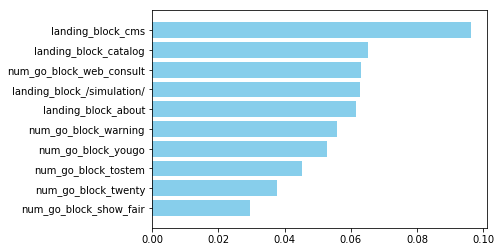

In [513]:
feature_names = df_train.columns[2:]
importances = model.feature_importances_

index_top_10 = np.argsort(importances)[::-1][:10] 

# 変数の重要度をグラフに描画
plt.barh(range(10), importances[index_top_10][::-1], color = 'skyblue', align = 'center')
plt.yticks(range(10), feature_names[index_top_10][::-1])
plt.ylim(-1, 10);

In [514]:
y_pred = model.predict(new_X_test)

In [515]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [353]:
#201712
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5776686661880168
precision: 0.03589990891067888
recall: 0.7346491228070176


In [371]:
#201712正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.6064803020126456
precision: 0.03628078675664763
recall: 0.6896929824561403
実際の割合 Counter({0.0: 42265, 1.0: 912})
予測の割合 Counter({0.0: 25840, 1.0: 17337})


In [385]:
#201801
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.6018406183923186
precision: 0.03555045871559633
recall: 0.7588395285584769
実際の割合 Counter({0.0: 56595, 1.0: 1103})
予測の割合 Counter({0.0: 34154, 1.0: 23544})


In [400]:
#201801正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5673333564421644
precision: 0.033946638540567994
recall: 0.7878513145965549
実際の割合 Counter({0.0: 56595, 1.0: 1103})
予測の割合 Counter({0.0: 32099, 1.0: 25599})


In [415]:
#201802
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.584688264589009
precision: 0.02819672131147541
recall: 0.756043956043956
実際の割合 Counter({0.0: 56719, 1.0: 910})
予測の割合 Counter({0.0: 33229, 1.0: 24400})


In [429]:
#201802正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5591455690711273
precision: 0.027250270186814883
recall: 0.7758241758241758
実際の割合 Counter({0.0: 56719, 1.0: 910})
予測の割合 Counter({0.0: 31721, 1.0: 25908})


In [443]:
#201803
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5571062626976415
precision: 0.03489321974559458
recall: 0.7752808988764045
実際の割合 Counter({0.0: 55448, 1.0: 1157})
予測の割合 Counter({0.0: 30898, 1.0: 25707})


In [457]:
#201803正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.528451550216412
precision: 0.03316391824198325
recall: 0.783923941227312
実際の割合 Counter({0.0: 55448, 1.0: 1157})
予測の割合 Counter({0.0: 29256, 1.0: 27349})


In [472]:
#201804
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5150173611111111
precision: 0.045377453186113324
recall: 0.7869147659063626
実際の割合 Counter({0.0: 55934, 1.0: 1666})
予測の割合 Counter({1.0: 28891, 0.0: 28709})


In [486]:
#201804正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.5415972222222222
precision: 0.04562486224377342
recall: 0.7454981992797118
実際の割合 Counter({0.0: 55934, 1.0: 1666})
予測の割合 Counter({0.0: 30378, 1.0: 27222})


In [501]:
#201805
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.48298669216670653
precision: 0.05274938886107266
recall: 0.8656355727404543
実際の割合 Counter({0.0: 60676, 1.0: 2069})
予測の割合 Counter({1.0: 33953, 0.0: 28792})


In [516]:
#201805正規化
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))

print("実際の割合",Counter(y_test))
print("予測の割合",Counter(y_pred))

accuracy: 0.4834329428639732
precision: 0.0528983585300445
recall: 0.8675688738521025
実際の割合 Counter({0.0: 60676, 1.0: 2069})
予測の割合 Counter({1.0: 33933, 0.0: 28812})
